# 📘 Modul: Pengenalan Facial Landmark Detection dengan MediaPipe

## 📌 Pengantar: Apa Itu Facial Landmark?

Facial landmark adalah deteksi titik-titik kunci pada wajah manusia, yang menunjukkan posisi dan bentuk fitur wajah seperti mata, hidung, mulut, dan garis rahang. Facial landmark terdiri dari serangkaian titik yang mewakili fitur wajah dalam gambar atau video. Deteksi ini sangat penting dalam banyak aplikasi, seperti:

- 👁️ **Pengenalan wajah**, digunakan dalam keamanan atau otentikasi.
- 🎭 **Pengenalan ekspresi wajah**, digunakan dalam analisis emosi atau interaksi virtual.
- 🤳 **Aplikasi pengeditan foto**, seperti pemrograman filter atau efek wajah.
- 🎥 **Animasi dan augmented reality (AR)**, untuk menyesuaikan karakter digital dengan ekspresi wajah pengguna.

### 🧠 Mengapa Ini Penting?
Facial landmark memungkinkan perangkat untuk memahami dan menginterpretasikan ekspresi wajah manusia, yang sangat penting dalam:
- **Pengenalan wajah**, yang digunakan di smartphone atau sistem keamanan.
- **Deteksi emosi**, yang dapat mendeteksi kebahagiaan, kesedihan, atau keheranan dari ekspresi wajah.
- **Virtual try-on**, seperti pada aplikasi makeup atau kacamata AR.

Dengan menggunakan teknik ini, kita dapat mengidentifikasi lebih dari **68 titik** pada wajah manusia, yang meliputi bagian seperti:
- **Mata** (termasuk kelopak mata dan pupil)
- **Hidung**
- **Mulut**
- **Bibir** dan **Garis Rahang**

Pada modul ini, kita akan mempelajari bagaimana menggunakan **MediaPipe Face Mesh** untuk mendeteksi dan menggambar **facial landmarks** pada gambar atau video real-time.


### 🧠 1. Apa Itu MediaPipe?

**MediaPipe** adalah framework dari Google untuk membangun pipeline pemrosesan media (video/audio). Salah satu kemampuannya adalah **Face Mesh** — yaitu mendeteksi 468 titik landmark pada wajah dalam waktu nyata (real-time).

### 👁️ 2. Import Library

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os

### 📸 3. Baca dan Tampilkan Gambar Input

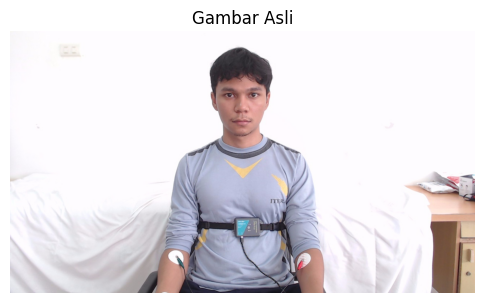

In [2]:
img_path = os.path.join(os.getcwd(), 'data', 'sample_toby.jpg')

img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis('off')
plt.show()

### 🔍 4. Deteksi Landmark Wajah dengan MediaPipe

In [3]:
mp_face_mesh = mp.solutions.face_mesh

# Inisialisasi face mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5)

# Proses deteksi
results = face_mesh.process(img_rgb)

**Penjelasan:**
- Mengimpor `face_mesh` dari MediaPipe,  yang memungkinkan kita untuk mendeteksi landmark wajah. Dengan modul ini, kita bisa mendeteksi hingga 468 titik pada wajah manusia.
- Inisialisasi Face Mesh:
    - Membuat objek `face_mesh` yang akan digunakan untuk mendeteksi landmark wajah pada gambar atau video.
    - `static_image_mode=True`: Mengaktifkan mode gambar diam, artinya deteksi hanya dilakukan sekali untuk gambar yang diberikan, tanpa pelacakan antar frame (digunakan jika hanya ingin mendeteksi satu gambar).
    - `max_num_faces=1`: Membatasi deteksi wajah hanya pada 1 wajah dalam gambar. Jika ada lebih dari satu wajah, hanya wajah pertama yang akan dideteksi.
    - `min_detection_confidence=0.5`: Menetapkan ambang batas kepercayaan minimum untuk deteksi wajah. Deteksi wajah hanya dianggap valid jika kepercayaan model lebih besar dari 0.5 (50%).
- Proses deteksi landmark wajah:
    - `img_rgb` adalah gambar input dalam format RGB yang telah dikonversi sebelumnya.
    - `face_mesh.process(img_rgb)` menjalankan model Face Mesh untuk mendeteksi titik-titik wajah pada gambar.
    - Hasil deteksi disimpan dalam objek results, yang berisi informasi tentang posisi titik-titik landmark wajah (jika deteksi berhasil).

### ✅ 5. Cek dan Gambar Titik Landmark

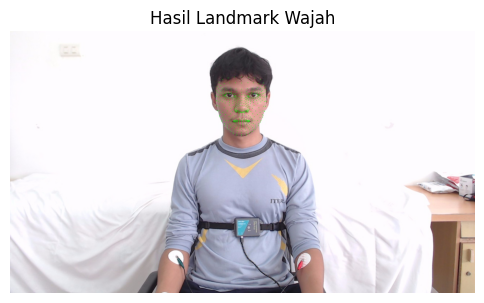

In [4]:
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for id, landmark in enumerate(face_landmarks.landmark):
            ih, iw, _ = img.shape
            x, y = int(landmark.x * iw), int(landmark.y * ih)
            cv2.circle(img, (x, y), 1, (0, 255, 0), -1)
else:
    print("Tidak ada wajah terdeteksi.")

# Tampilkan hasil
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_result)
plt.title("Hasil Landmark Wajah")
plt.axis('off')
plt.show()

**Penjelasan:**
- Pemeriksaan hasil deteksi wajah:
    - `results.multi_face_landmarks` berisi landmark wajah untuk semua wajah yang terdeteksi dalam gambar.
    - Kondisi ini memeriksa apakah ada setidaknya satu wajah yang terdeteksi. Jika ada, kode di dalam blok if akan dieksekusi.
- Iterasi untuk setiap wajah yang terdeteksi:
    - `results.multi_face_landmarks` adalah list yang berisi deteksi landmark wajah untuk setiap wajah yang terdeteksi.
    - `for face_landmarks in results.multi_face_landmarks`: akan mengulang untuk setiap wajah yang ditemukan, sehingga jika lebih dari satu wajah terdeteksi, program akan memproses masing-masing wajah.
-  Iterasi untuk setiap landmark pada wajah:
    - `face_landmarks.landmark` adalah list yang berisi semua landmark (titik-titik wajah) pada wajah yang terdeteksi.
    - Fungsi `enumerate()` digunakan untuk mendapatkan indeks `id` dan titik landmark itu sendiri (`landmark`), yang memudahkan pemrosesan setiap titik pada wajah.
- Mengambil dimensi gambar:
    - `img.shape` memberikan dimensi gambar dalam format (`tinggi, lebar, jumlah saluran warna`).
    - `ih` dan `iw` menyimpan tinggi dan lebar gambar, yang dibutuhkan untuk mengonversi koordinat relatif ke gambar asli (yang biasanya dalam format antara 0 hingga 1) ke koordinat pixel gambar nyata.
- Mengonversi koordinat relatif ke koordinat gambar:
    - `landmark.x` dan `landmark.y` adalah koordinat titik landmark pada wajah yang berada dalam rentang 0 hingga 1 (relatif terhadap lebar dan tinggi gambar).
    - Untuk mendapatkan posisi pixel yang sesuai pada gambar, koordinat ini dikalikan dengan lebar (`iw`) dan tinggi (`ih`) gambar, lalu dibulatkan ke nilai integer untuk mendapatkan koordinat pixel (`x, y`).
-  Gambar titik pada gambar:
    - Fungsi `cv2.circle()` digunakan untuk menggambar titik pada gambar pada posisi (`x, y`).
    - Parameter `1` menunjukkan ukuran radius lingkaran (1 pixel), (`0, 255, 0`) adalah warna hijau dalam format BGR, dan `-1` berarti mengisi lingkaran tersebut (dengan warna hijau).
- Konversi gambar ke format RGB:
    - OpenCV membaca gambar dalam format BGR secara default. `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` mengonversi gambar ke format RGB agar bisa ditampilkan dengan benar menggunakan `matplotlib`.

### 📌 6. Penjelasan Landmark

MediaPipe mendeteksi **468 titik landmark** di wajah, yang mencakup:
- Mata (inner & outer)
- Alis
- Hidung
- Bibir
- Kontur wajah

Setiap titik memiliki indeks (0–467). Misalnya:
- Titik 33 → sudut mata kiri
- Titik 1 → ujung hidung
- Titik 61 → sudut bibir kiri

### 🧪 7. Ekstrak dan Cetak Koordinat Landmark

In [5]:
landmark_list = []
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        for id, lm in enumerate(face_landmarks.landmark):
            ih, iw, _ = img.shape
            x, y = int(lm.x * iw), int(lm.y * ih)
            landmark_list.append((id, x, y))

# Cetak 5 landmark pertama
for point in landmark_list[:5]:
    print(f"ID: {point[0]}, X: {point[1]}, Y: {point[2]}")

ID: 0, X: 956, Y: 362
ID: 1, X: 958, Y: 330
ID: 2, X: 957, Y: 338
ID: 3, X: 949, Y: 297
ID: 4, X: 958, Y: 321


**Penjelasan:**
- Inisialisasi list kosong:
    - Membuat list kosong bernama `landmark_list` untuk menyimpan koordinat dan ID dari setiap titik landmark wajah yang terdeteksi.
- Pemeriksaan hasil deteksi wajah:
    - Memeriksa apakah ada wajah yang terdeteksi dalam gambar. `results.multi_face_landmarks` akan berisi deteksi landmark untuk semua wajah yang terdeteksi. Jika ada, blok kode berikut akan dijalankan.
- Iterasi untuk setiap wajah:
    - `results.multi_face_landmarks` adalah sebuah list yang berisi hasil deteksi landmark untuk setiap wajah yang ditemukan.
    - Iterasi pertama akan mengulangi untuk setiap wajah yang terdeteksi, dan untuk setiap wajah akan diproses landmark-nya.
- Iterasi untuk setiap landmark pada wajah:
    - `face_landmarks.landmark` adalah list yang berisi 468 landmark untuk wajah yang terdeteksi.
    - Fungsi `enumerate()` digunakan untuk mendapatkan ID dan koordinat (landmark) dari setiap titik pada wajah.
-  Mengambil dimensi gambar:
    - `img.shape` memberikan dimensi gambar dalam format (`tinggi, lebar, jumlah saluran warna`).
    - `ih` (height) dan `iw` (width) adalah tinggi dan lebar gambar, yang digunakan untuk mengonversi koordinat relatif ke koordinat pixel gambar asli.
- Mengonversi koordinat relatif ke koordinat pixel:
    - Landmark yang dideteksi oleh MediaPipe memiliki koordinat dalam rentang 0 hingga 1 (relatif terhadap ukuran gambar).
    - Koordinat (`lm.x, lm.y`) dikalikan dengan lebar (`iw`) dan tinggi (`ih`) gambar untuk mengonversi ke koordinat pixel di gambar nyata, kemudian dibulatkan ke bilangan bulat (`int`).
- Menyimpan landmark:
    - Setiap ID landmark beserta koordinat (`x, y`) yang telah dihitung dimasukkan ke dalam list `landmark_list` dalam bentuk tuple (`id, x, y`). Dengan cara ini, kita bisa menyimpan semua titik landmark dari semua wajah yang terdeteksi.
-  Menampilkan 5 landmark pertama:
    - Loop ini akan menampilkan 5 landmark pertama yang ada di `landmark_list`.
    - Setiap `point` adalah tuple (`id, x, y`) yang berisi ID landmark dan koordinat (`x, y`) di gambar.
    - `print(f"ID: {point[0]}, X: {point[1]}, Y: {point[2]}")` mencetak ID dan posisi (x, y) untuk masing-masing dari 5 landmark pertama.

---
### Webcam

In [1]:
import cv2
import mediapipe as mp

# Inisialisasi MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, 
                                   max_num_faces=1, 
                                   min_detection_confidence=0.5, 
                                   min_tracking_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Buka kamera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame dari kamera.")
        break

    # Konversi ke RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Deteksi landmark wajah
    results = face_mesh.process(frame_rgb)

    # Gambar landmark
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec
            )

    # Tampilkan hasil
    cv2.imshow("Facial Landmark Detection", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Bersihkan
cap.release()
cv2.destroyAllWindows()


**Penjelasan:**
- `static_image_mode=False`: Mode ini memungkinkan pelacakan antar frame, cocok untuk input dari kamera.
- `min_tracking_confidence`: Memberi batas kepercayaan untuk mempertahankan pelacakan antar frame.
- `FACEMESH_TESSELATION`: Menghubungkan titik-titik wajah dengan mesh.
- `drawing_spec`: Mengatur ketebalan dan ukuran titik yang digambar.
- `cv2.VideoCapture(0)`: Membuka kamera default (biasanya webcam laptop).

In [1]:
import cv2
import mediapipe as mp

# Inisialisasi MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False,
                                   max_num_faces=1,
                                   min_detection_confidence=0.5,
                                   min_tracking_confidence=0.5)

# Buka kamera
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame dari kamera.")
        break

    # Konversi ke RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Deteksi landmark wajah
    results = face_mesh.process(frame_rgb)

    # Ambil dimensi gambar
    ih, iw, _ = frame.shape

    # Gambar titik landmark wajah (tanpa koneksi)
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            for lm in face_landmarks.landmark:
                x, y = int(lm.x * iw), int(lm.y * ih)
                cv2.circle(frame, (x, y), 1, (0, 255, 0), -1)

    # Tampilkan hasil
    cv2.imshow("Facial Landmark", frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Bersihkan
cap.release()
cv2.destroyAllWindows()


**Apa yang Diubah?**
- Tidak menggunakan `draw_landmarks()` dari MediaPipe.
- Diganti dengan `loop for lm in face_landmarks.landmark` dan menggambar manual titiknya dengan `cv2.circle()`.`
- Titik ditampilkan dalam warna hijau (`0, 255, 0`) dan radius kecil 1.